In [1]:
import sys
main_dir = '../'
main_dir2 = '../../OQSPlots'
sys.path.append(main_dir)
sys.path.append(main_dir2)

from functools import lru_cache

from qutip import piqs

import run

import numpy as np
from scipy.optimize import minimize, minimize_scalar
from scipy.interpolate import interp1d
import tqdm

import matplotlib.pyplot as plt

import opennu as on
import gammas as ga

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

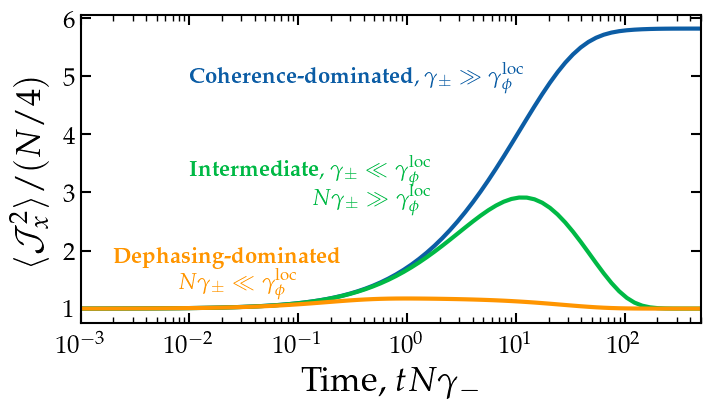

In [31]:
Ncode = 1e2

gpr = 0.997
ti = 1e-3
tf = 1e4
nt = 100

fig, ax = plt.subplots(1,1,figsize=(8,4))

t0, z0, _, j0, _ = on.solve2nd(Ncode, gp_ratio=gpr, gd_ratio=0,    ti=ti, tf=tf, ntimes=nt)
t1, z1, _, j1, _ = on.solve2nd(Ncode, gp_ratio=gpr, gd_ratio=15,   ti=ti, tf=tf, ntimes=nt)
t2, z2, _, j2, _ = on.solve2nd(Ncode, gp_ratio=gpr, gd_ratio=Ncode,  ti=ti, tf=tf, ntimes=nt)
t3, z3, _, j3, _ = on.solve2nd(Ncode, gp_ratio=gpr, gd_ratio=5*Ncode, ti=ti, tf=tf, ntimes=nt)
ax.loglog(t0, np.sqrt(j0/Ncode*4))
ax.loglog(t1, np.sqrt(j1/Ncode*4))
#plt.loglog(t2, np.sqrt(j2/Ncode*4))
ax.loglog(t3, np.sqrt(j3/Ncode*4))

ax.text(1e-2, 4.9, r'{\bf Coherence-dominated}, $\gamma_{\pm}\gg\gamma^{\rm loc}_\phi$', c='C0', fontsize=16)
ax.text(1e-2, 3.3, r'{\bf Intermediate}, $\gamma_{\pm}\ll\gamma^{\rm loc}_\phi$', c='C1', fontsize=16)
ax.text(1.38e-1, 2.8, r'$N\gamma_{\pm}\gg\gamma^{\rm loc}_\phi$', c='C1', fontsize=16)

ax.text(2e-3, 1.8, r'{\bf Dephasing-dominated}', c='C2', fontsize=16)
ax.text(8e-3, 1.35, r'$N\gamma_{\pm}\ll\gamma^{\rm loc}_\phi$', c='C2', fontsize=16)

ax.set_xlim(1e-3,5e2)
# plt.ylim(0.8, 10)

ax.set_xlabel(r'Time,~$tN\gamma_-$', fontsize=25)
ax.set_ylabel(r'$\langle {\cal J}_x^2\rangle/(N/4)$', fontsize=25, labelpad=10)
#ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax.set_yscale('linear')
# ax.set_yticks([]) 
# ax.set_yticklabels([]) 
# plt.gca().set_yticks([])
# plt.gca().set_yticklabels([])
plt.show()
fig.savefig(main_dir+'plots/regimes.pdf', bbox_inches='tight')

In [9]:
# t0, z0, sz0 = on.solve(Ncode, gp_ratio=gpr, gd_ratio=0,    ti=ti, tf=tf, ntimes=nt)
# t1, z1, sz1 = on.solve(Ncode, gp_ratio=gpr, gd_ratio=10,   ti=ti, tf=tf, ntimes=nt)
# t2, z2, sz2 = on.solve(Ncode, gp_ratio=gpr, gd_ratio=100,  ti=ti, tf=tf, ntimes=nt)
# t3, z3, sz3 = on.solve(Ncode, gp_ratio=gpr, gd_ratio=1000, ti=ti, tf=tf, ntimes=nt)


# plt.loglog(t0, sz0)
# plt.loglog(t1, sz1)
# plt.loglog(t2, sz2)
# plt.loglog(t3, sz3)

In [5]:
onu = '/Users/z5278074/work/OQS/OpenNu/output/N100/'

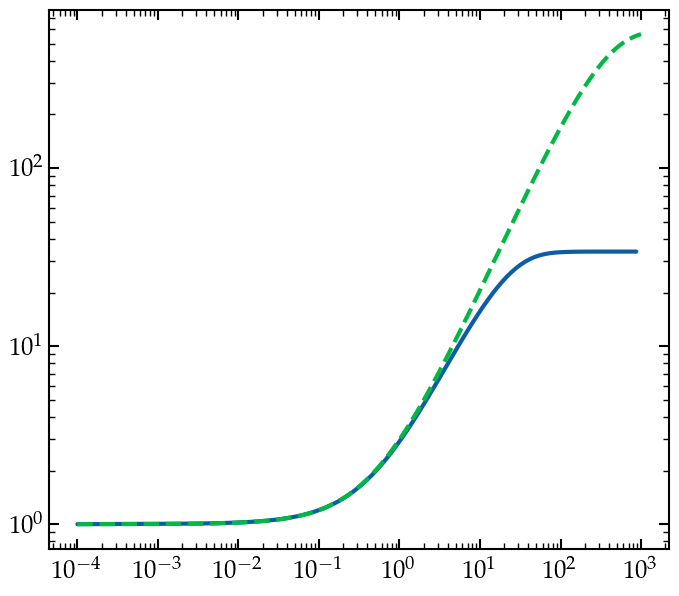

In [17]:
onu_100 = np.loadtxt(onu+'/Ground_Euler_h0.1_g0.997.txt')

Ncode = 10000
t, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=0,tf=1e3)

plt.loglog(onu_100[:,0], onu_100[:,4]/25, label='OpenNu')
plt.loglog(t, j0/Ncode*4, label='Approx', ls='--')
plt.show()

In [3]:
N = 40
state = piqs.dicke(N,N/2,-N/2)

# Gammas
gE  = 0 # local emission
gD  = N # local dephasing
gP  = 0 # local pumping
gCE = 1 # collective emission
gCD = 0 # collective dephasing
gCP = 0.997 # collective pumping

# Time parameters for QuTip
nt = 1001
td0 = 1/(N*gCE)
tmax = 100 * td0
tq = np.geomspace(0.00001, tmax, nt)

q_jx, q_jz, q_jx2, q_jz2, q_jpm, q_jmp, _ = run.RunQutip(N, tq, state, gE, gP, gD, gCE, gCP, gCD)

Time (in seconds) to generate the Liouvillian: 0.06759428977966309
Elapsed time (in seconds) for this run:  37.278324365615845


In [18]:
Ncode = 40
t0, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=10, tf=1e2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


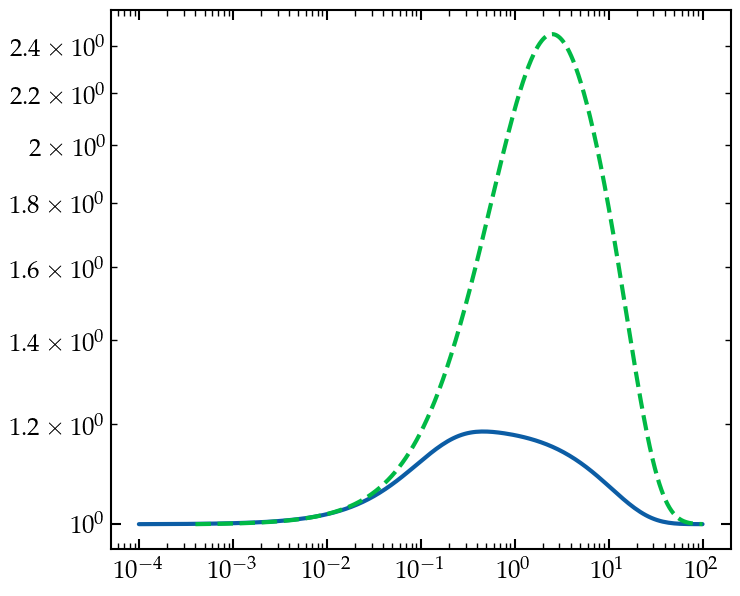

In [19]:
plt.loglog(t0, j0/Ncode*4)
plt.loglog(tq/td0, q_jx2/N*4, ls='--')
plt.legend()
plt.show()

In [62]:
ga2 = []
N = 30
for ga in [0,5,200]:
    state = piqs.dicke(N,N/2,-N/2)
    nt = 301
    td0 = np.log(N)/(N)
    tmax = 50*td0
    tq = np.geomspace(0.00001, tmax, nt)
    _, _, jx2, _, _, _, _ = run.RunQutip(N, tq, state,0,0,ga,1,0.8,0)
    ga2.append(jx2)

Time (in seconds) to generate the Liouvillian: 0.023854494094848633
Elapsed time (in seconds) for this run:  9.600318908691406
Time (in seconds) to generate the Liouvillian: 0.027037620544433594
Elapsed time (in seconds) for this run:  10.8726966381073
Time (in seconds) to generate the Liouvillian: 0.027190208435058594
Elapsed time (in seconds) for this run:  34.59231495857239


In [63]:
Ncode = 30
t0, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.8,gd_ratio=0,tf=1e3)
t0, _, _, j1, _ = on.solve2nd(Ncode,gp_ratio=0.8,gd_ratio=5,tf=1e3)
t0, _, _, j2, _ = on.solve2nd(Ncode,gp_ratio=0.8,gd_ratio=200,tf=1e3)

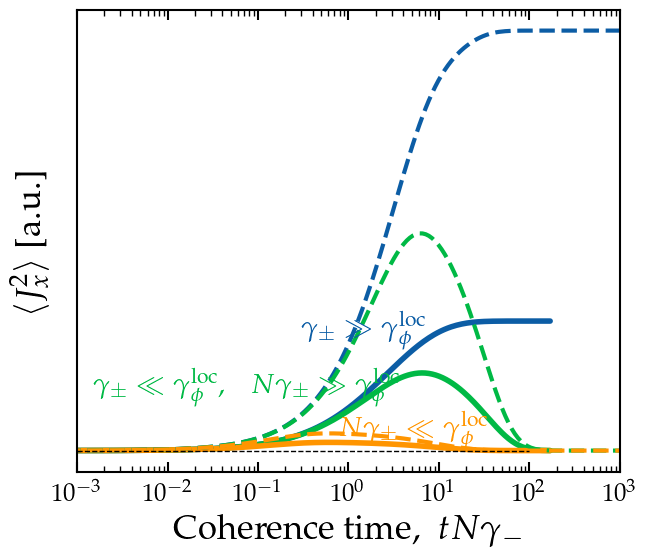

In [64]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig, ax = plt.subplots(figsize=(7,6))

for i in range(3):
    plt.loglog(tq*N, np.sqrt(ga2[i]/N*4),c=cols[i],lw=4)

plt.loglog(t0, j0/Ncode*4, ls='--')
plt.loglog(t0, j1/Ncode*4, ls='--')
plt.loglog(t0, j2/Ncode*4, ls='--')http://localhost:8888/tree?token=242aac168725790dc6d8fffb5ee694aca32fc3ccfa9732f6

plt.text(0.3,2.4, r'$\gamma_{\pm}\gg \gamma^{\rm loc}_{\phi}$', color=cols[0])
plt.text(0.0015,1.7, r'$\gamma_{\pm}\ll \gamma^{\rm loc}_{\phi},~~~N\gamma_{\pm}\gg \gamma^{\rm loc}_{\phi}$', color=cols[1])
plt.text(0.8,1.18, r'$N\gamma_{\pm}\ll \gamma^{\rm loc}_{\phi}$', color=cols[2])
tt = np.geomspace(1e-3, 100)
plt.loglog(tt, tt/tt, ls='--', c='k', lw=1)

plt.yscale('linear')
plt.yticks([])
plt.xlim(1e-3,1e3)
#plt.ylim(0.9,2.8)
plt.xlabel(r'Coherence time,  $~tN\gamma_-$', fontsize=25)
plt.ylabel(r'$\langle J_x^2\rangle$ [a.u.]', fontsize=25, labelpad=20)
plt.show()

In [90]:
N = 30

t0, _, _, j0, _ = on.solve2nd(N,gp_ratio=0.997,gd_ratio=30,tf=1e3)

state = piqs.dicke(N,N/2,-N/2)
nt = 301
td0 = 1/(N)
tmax = 50*td0
tq = np.geomspace(0.00001, tmax, nt)
_, _, jx2, _, _, _, _ = run.RunQutip(N, tq, state,0,0,30,1,0.997,0)

Time (in seconds) to generate the Liouvillian: 0.027335166931152344
Elapsed time (in seconds) for this run:  4.085618495941162


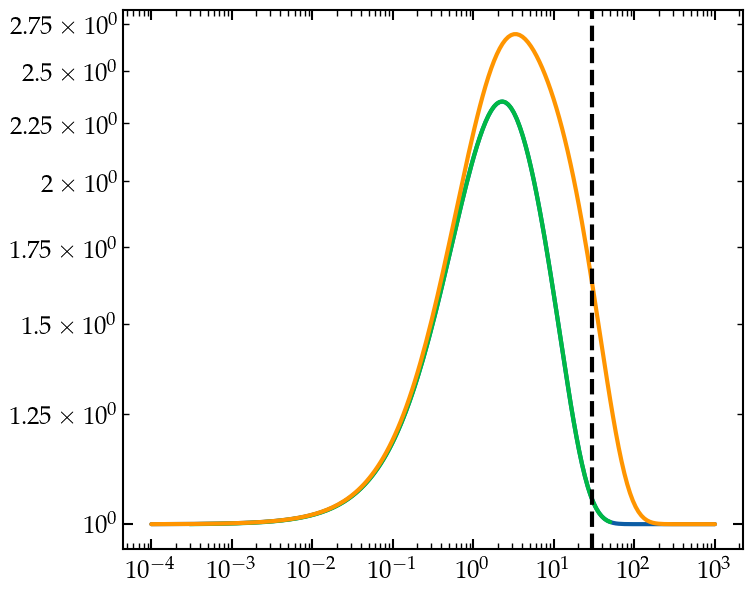

In [94]:
N2 = 100
t0, _, _, j1, _ = on.solve2nd(N2,gp_ratio=0.997,gd_ratio=N2,tf=1e3)

plt.loglog(t0, j0/N*4)
plt.loglog(tq/td0, jx2/N*4)
plt.loglog(t0, j1/N2*4)

plt.axvline(N, c='k', ls='--')

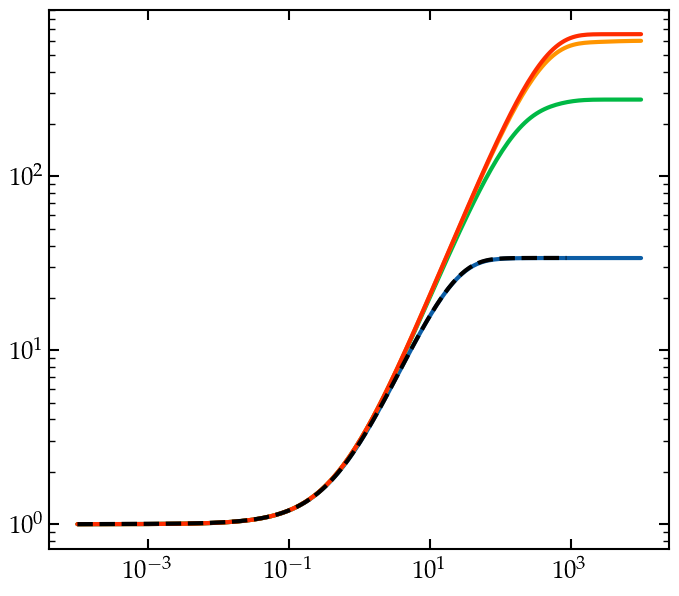

In [28]:
for n in [100,1000,1e4,1e5]:
    t, _, _, j0, _ = on.solve2nd(n,gp_ratio=0.997,gd_ratio=0,tf=1e4)
    plt.loglog(t, j0/n*4)

plt.loglog(onu_100[:,0], onu_100[:,4]/25, label='OpenNu',c='k', ls='--')
plt.show()

In [41]:
1-0.997

0.0030000000000000027

In [ ]:
Ncode = 1e5
# t, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=0,ti=1e-5,tf=1e6)
# t, _, _, j1, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=Ncode,ti=1e-5,tf=1e6)

t, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=0,tf=1e6)
#t, _, _, j1, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=0.1*Ncode,tf=1e6)
t, _, _, j2, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=100*Ncode,tf=1e6)
